## Titanic Kaggle Competition <a class="anchor" id="first-bullet"></a>
### Exploratory Data Analysis
Our focus here is to:
- Gain intuition about the data
- Make sure that insights we're drawing are actually from the right dataset
- Find out where data is missing
- Check for outliers
- Summarize the data

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (15, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565", "#48BB78", "#ED8936", "#9F7AEA", "#ECC94B"])
rcParams["figure.facecolor"] = "#1A202C"
rcParams["axes.facecolor"] = "#2D3748"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

train = pd.read_pickle("titanic-train.pkl")

def UVANumeric(df, column):
    col = df[column].dropna()
    minVal = col.min()
    maxVal = col.max()
    rangeVal = maxVal - minVal
    mean = col.mean()
    median = col.median()
    std = col.std()
    stdLow = mean - std
    stdHigh = mean + std
    skew = col.skew()
    # Kurtosis is the 4th central moment over squared variance - 3
    # for identifying whether the tails contain extreme values
    kurtosis = col.kurtosis()
    
    sns.kdeplot(col, shade=True, label=column)
    sns.lineplot(x=[stdLow, stdHigh], y=[0, 0], color="orange", linewidth=5, label="std dev")
    sns.scatterplot(x=[minVal, maxVal], y=[0, 0], color="red", s=200, label="min/max")
    sns.scatterplot(x=[mean], y=[0], color="green", s=200, label="mean")
    sns.scatterplot(x=[mean], y=[0], color="purple", s=200, label="median")
    plt.xlabel(column)
    plt.title("{} Univariate Analysis".format(column))
    
    figtext = "Min: {} | Max: {} | Range: {} | Mean: {} | Median: {}\nStd: {} | StdLow: {} | StdHigh: {} | Skew: {} | Kurtosis: {}"
    figtext = figtext.format(round(minVal, 2), round(maxVal, 2), round(rangeVal, 2), round(mean, 2), round(median, 2), round(std, 2), round(stdLow, 2), round(stdHigh, 2), round(skew, 2), round(kurtosis, 2))
    plt.figtext(0.5, -0.05, figtext, **{"fontsize": 20, "color": "#A0AEC0", "horizontalalignment": "center"})
    
def UVACategory(df, column, vertical=False):
    col = df[column].dropna()
    count = col.value_counts()
    maxVal = max(count)
    indexes = count.index.tolist()
    normedCount = col.value_counts(normalize=True)
    uniqueCount = col.nunique()
    
    rotation = 90 if vertical else 0
    
    plot = sns.countplot(x=col)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=rotation)
    i = 0
    for p in plot.patches:
        height = p.get_height()
        width = p.get_width()
        
        iNormedCount = round(normedCount[indexes[i]], 2)
        iNormedCount = round(normedCount[indexes[i]], 4) if iNormedCount == 0 else iNormedCount
        isShort = (height / maxVal) < 0.1
        xPos = p.get_x() + width / 2.0
        yPos = height if isShort else height / 2.0
        va = "bottom" if isShort else "center"
        
        text = "{}\n{}".format(round(count[indexes[i]], 2), iNormedCount)
        plot.text(xPos, yPos, text, ha="center", va=va, rotation=rotation, size=12)
        i += 1
    plt.title("{} Univariate Analysis\nUnique: {} values".format(column, uniqueCount))

#### Draw out important insights
1. Variables
    - Pclass
        - Ticket class, used as a proxy for socio-economic status
        - Categorical (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
    - Sex
        - Categorical (male or female)
    - Age
        - Numerical (min = 0.42, max = 80)
    - SibSp
        - num of siblings / spouses aboard the Titanic
        - Numerical (min = 0, max = 8)
    - Parch
        - num of parents / children aboard the Titanic
        - Numerical (min = 0, max = 6)
    - Fare
        - Passenger fare
        - Numerical (min = 0, max = 512.3292)
    - Embarked
        - Which port the passenger embarked from
        - Categorical (C = Cherbourg, Q = Queenstown, S = Southampton)
    - Survived
        - **Output variable**
        - Categorical (0 = Didn't survive, 1 = Survived)
2. Univariate Analysis

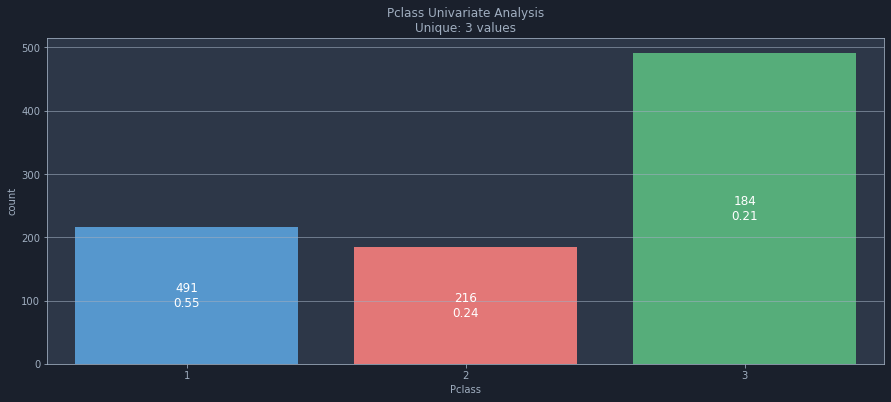

In [3]:
UVACategory(train, "Pclass")

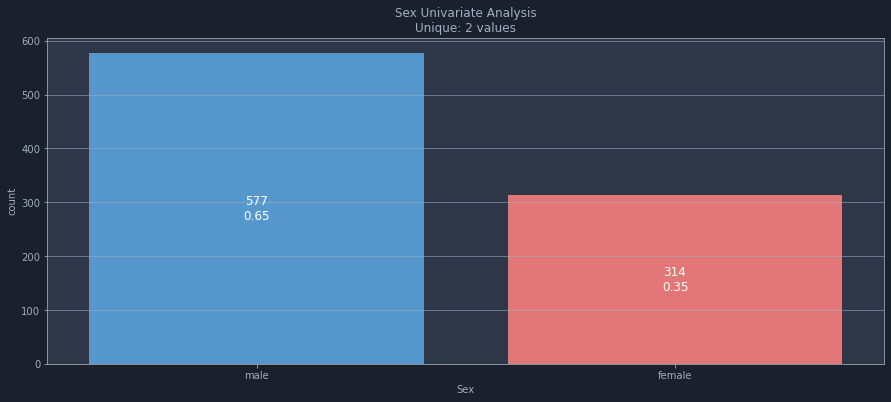

In [4]:
UVACategory(train, "Sex")

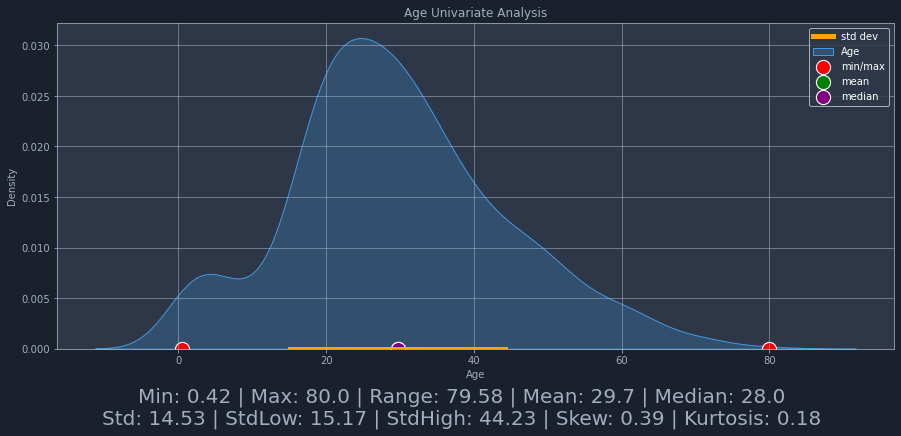

In [5]:
UVANumeric(train, "Age")

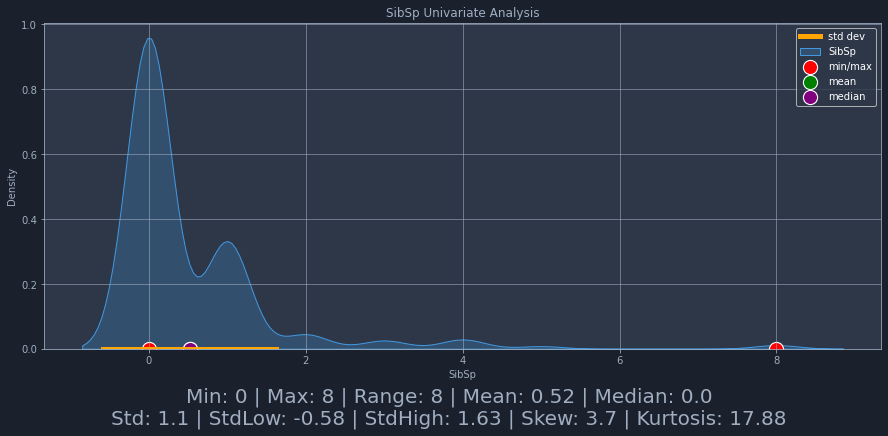

In [12]:
UVANumeric(train, "SibSp")

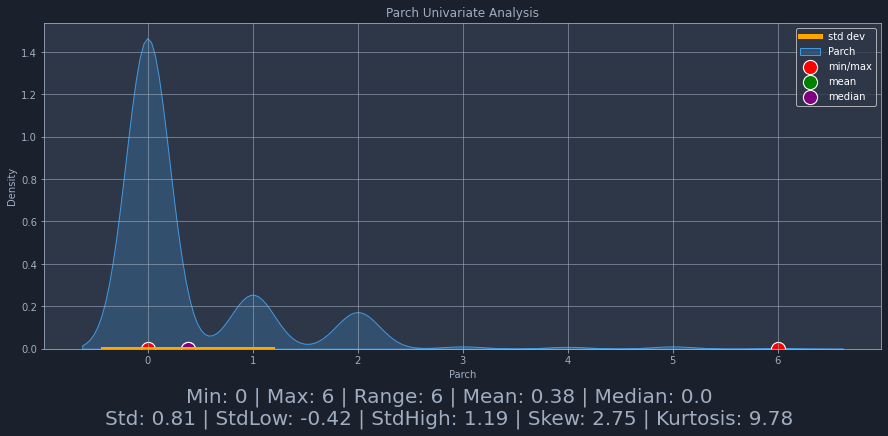

In [7]:
UVANumeric(train, "Parch")

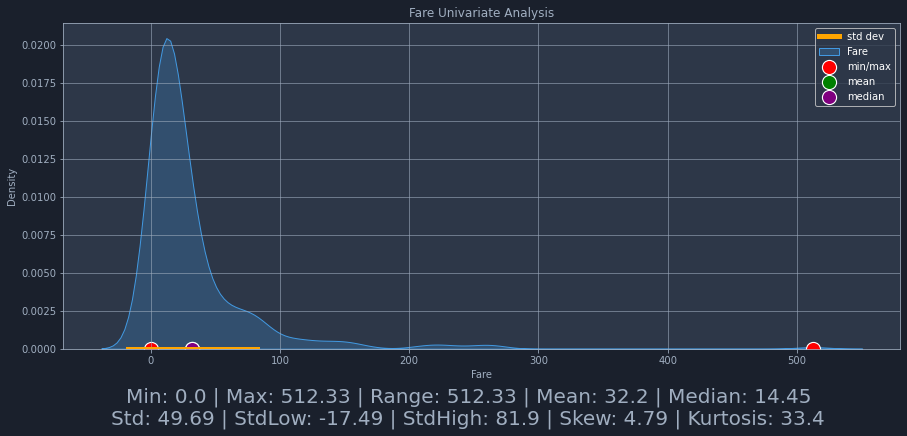

In [8]:
UVANumeric(train, "Fare")

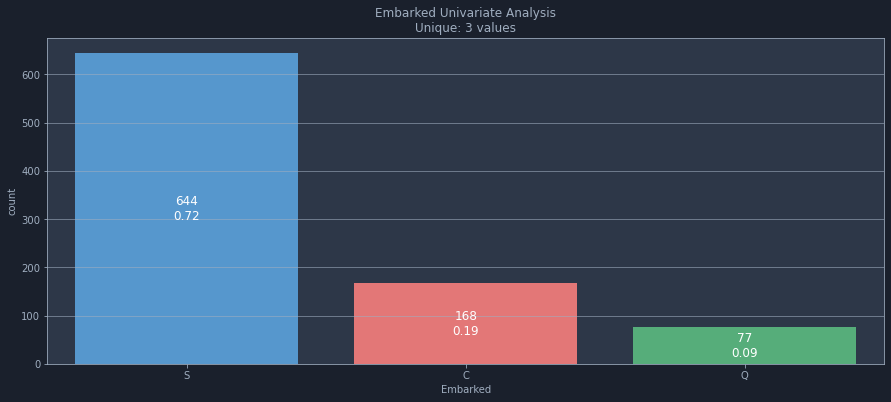

In [9]:
UVACategory(train, "Embarked")

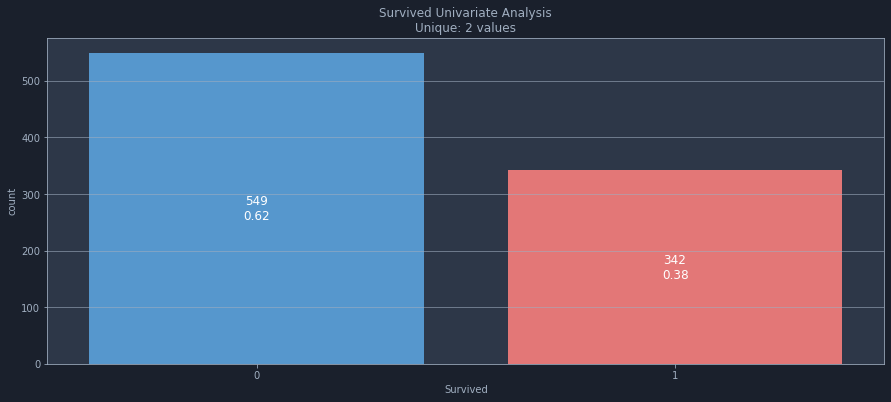

In [10]:
UVACategory(train, "Survived")